## Installing Transformers

In [ ]:
%pip install transformers

## Importing torch & pandas

In [2]:
import torch

In [3]:
import pandas as pd

## Dataset

<b>Source 1: </b>[Data](https://github.com/ososs/Arabic-Sentiment-Analysis-corpus/blob/master/MSAC.arff) <br/>
<b>Source 2: </b>[Data](https://github.com/kabilessefar/OMCD-Offensive-Moroccan-Comments-Dataset/blob/main/train.csv)

In [ ]:
import pandas as pd
with open('data.csv', 'r', encoding='utf-8') as file:
    lines = file.readlines()

header = lines[0].strip().split(',')

ids = []
texts = []
labels = []

for line in lines[1:]:
            if line.strip() == "":
                continue

            first_comma_idx = line.find(',')
            if first_comma_idx == -1:
                continue

            id_val = line[:first_comma_idx].strip()

            last_comma_idx = line.rfind(',')
            if last_comma_idx == first_comma_idx:
                continue

            text = line[first_comma_idx+1:last_comma_idx].strip()
            label = line[last_comma_idx+1:].strip()

            if text.startswith('"') and text.endswith('"'):
                text = text[1:-1]
            if label.startswith('"') and label.endswith('"'):
                label = label[1:-1]

            ids.append(id_val)
            texts.append(text)
            labels.append(label)

data1 = pd.DataFrame({
    'text': texts,
    'class': labels
})
data1.head()

,text,class
0,طوال حياتي لم المس اي تغير حتى قدمت هذه الحكوم...,pos
1,منتوج رائع وثمن مناسب ....جميل,pos
2,كلنا ابن كيران لمتافق معايا يدير جيم,pos
3,وفقك الله لولاية اخرى حقاش مكينش محسن منك,pos
4,لأنه و بكل بساطة رئيس الحكومة يعتني بمعاق داخل...,pos


In [19]:
data1.replace(to_replace=['pos', 'neg'], value=[1, 0], inplace=True)

<ipython-input-19-81eca697ec44>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1.replace(to_replace=['pos', 'neg'], value=[1, 0], inplace=True)


In [21]:
data1.head()

,text,class
0,طوال حياتي لم المس اي تغير حتى قدمت هذه الحكوم...,1
1,منتوج رائع وثمن مناسب ....جميل,1
2,كلنا ابن كيران لمتافق معايا يدير جيم,1
3,وفقك الله لولاية اخرى حقاش مكينش محسن منك,1
4,لأنه و بكل بساطة رئيس الحكومة يعتني بمعاق داخل...,1


##Preparing second data  

In [23]:
data2 = pd.read_csv('data2.csv')
data2.replace(to_replace=[1, 0], value=[0, 1], inplace=True)
data2 = data2[['comment', 'off']]
data2.head()

,comment,off
0,فنانين الكبت والفساد .عقلية جنسية لا غير. العف...,0
1,الدعارة هربت منها في المحمدية و سكنت في بوزنيق...,0
2,كون غير خريتي و مدرتيش هادشي,0
3,لا حول ولا قوة الا بالله العلي العظيم لا حول و...,1
4,الله يرحم الوالدين عندي مشكل كبيييير و محتاجة ...,1


In [24]:
data2.columns = ['text', 'class']
data2.head()

,text,class
0,فنانين الكبت والفساد .عقلية جنسية لا غير. العف...,0
1,الدعارة هربت منها في المحمدية و سكنت في بوزنيق...,0
2,كون غير خريتي و مدرتيش هادشي,0
3,لا حول ولا قوة الا بالله العلي العظيم لا حول و...,1
4,الله يرحم الوالدين عندي مشكل كبيييير و محتاجة ...,1


##Processing third data

In [31]:
data3 = pd.read_csv('Train.csv')
data3.head()

,ID,Feed,Sentiment
0,1.0,m3alem bourjilia w illi ma yefehmouch yelzmou ...,Positive
1,2.0,Ya m3alllam,Positive
2,3.0,Ma7lek! Zin ou fannena 7loua.,Positive
3,4.0,hhhhh ya bliiiiiiiida ya Hanen,Negative
4,5.0,Nikraha w ma5yebha pffff,Negative


In [32]:
data3.replace(to_replace=["Positive", "Negative"], value=[1, 0], inplace=True)
data3 = data3[['Feed', 'Sentiment']]
data3.columns = ['text', 'class']
data3.head()

<ipython-input-32-45723b8030e2>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data3.replace(to_replace=["Positive", "Negative"], value=[1, 0], inplace=True)


,text,class
0,m3alem bourjilia w illi ma yefehmouch yelzmou ...,1
1,Ya m3alllam,1
2,Ma7lek! Zin ou fannena 7loua.,1
3,hhhhh ya bliiiiiiiida ya Hanen,0
4,Nikraha w ma5yebha pffff,0


In [34]:
data = pd.concat([data1, data2, data3], ignore_index=True)
data.head()
data.shape

(16817, 2)

In [41]:
print(data.isnull().sum())


text     4
class    0
dtype: int64


In [42]:
data = data.dropna()


## Preprocessing and training the Model

In [43]:
from sklearn.model_selection import train_test_split
X = data['text'].values
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [44]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


In [45]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [ ]:
def preprocessing_for_bert(data):
    input_ids = []
    attention_masks = []

    for sent in data:
        encoded_sent = tokenizer.encode_plus(
            text=sent,
            add_special_tokens=True,
            max_length=MAX_LEN,
            pad_to_max_length=True,
            return_attention_mask=True
            )

        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [ ]:
encoded_tweets = [
    tokenizer.encode(sent, add_special_tokens=True, max_length=512, truncation=True)
    for sent in X
]

MAX_LEN = max([len(sent) for sent in encoded_tweets])
print('Max length: ', MAX_LEN)

Max length:  512


In [ ]:
MAX_LEN = 512
token_ids = list(preprocessing_for_bert([X[0]])[0].squeeze().numpy())
print('Original: ', X[0])
print('Token IDs: ', token_ids)

train_inputs, train_masks = preprocessing_for_bert(X_train)
val_inputs, val_masks = preprocessing_for_bert(X_test)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2700: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  طوال حياتي لم المس اي تغير حتى قدمت هذه الحكومة فل نقف بجانها بصوتنا
Token IDs:  [np.int64(101), np.int64(1286), np.int64(29836), np.int64(25573), np.int64(23673), np.int64(1276), np.int64(14498), np.int64(25573), np.int64(29817), np.int64(14498), np.int64(1294), np.int64(22192), np.int64(1270), np.int64(23673), np.int64(22192), np.int64(29824), np.int64(1270), np.int64(14498), np.int64(1273), np.int64(29831), np.int64(14498), np.int64(17149), np.int64(1276), np.int64(29817), np.int64(29837), np.int64(1292), np.int64(15394), np.int64(22192), np.int64(29817), np.int64(1297), np.int64(29822), np.int64(14157), np.int64(1270), np.int64(23673), np.int64(29820), np.int64(29835), np.int64(29836), np.int64(22192), np.int64(19433), np.int64(1291), np.int64(23673), np.int64(1296), np.int64(29834), np.int64(29833), np.int64(1271), np.int64(29819), np.int64(18511), np.int64(14157), np.int64(25573), np.int64(1271), np.int64(29826), np.int64(29836), np.int64(29817), np.int64(15915), np.in

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_test)

batch_size = 16

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

In [50]:
import torch.nn as nn
from transformers import BertModel
import numpy as np

In [ ]:
class BertClassifier(nn.Module):
    def __init__(self, freeze_bert=False):
        super(BertClassifier, self).__init__()
        D_in, H, D_out = 768, 50, 2

        self.bert = BertModel.from_pretrained('bert-base-uncased')

        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            nn.Linear(H, D_out)
        )

        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)

        last_hidden_state_cls = outputs[0][:, 0, :]

        logits = self.classifier(last_hidden_state_cls)

        return logits

In [ ]:
from transformers import get_linear_schedule_with_warmup
from torch.optim import AdamW


def initialize_model(epochs=4):

    bert_classifier = BertClassifier(freeze_bert=False)
    bert_classifier.to(device)

    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,   
                      eps=1e-8   
                      )

    total_steps = len(train_dataloader) * epochs

    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [ ]:
import random
import time

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
 
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):

    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        t0_epoch, t0_batch = time.time(), time.time()
        total_loss, batch_loss, batch_counts = 0, 0, 0
        model.train()

        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)
            model.zero_grad()
            logits = model(b_input_ids, b_attn_mask)
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            optimizer.step()
            scheduler.step()

            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                time_elapsed = time.time() - t0_batch
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:

            val_loss, val_accuracy = evaluate(model, val_dataloader)
            time_elapsed = time.time() - t0_epoch

            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")

    print("Training complete!")


def evaluate(model, val_dataloader):

    model.eval()

    val_accuracy = []
    val_loss = []

    for batch in val_dataloader:
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())
        preds = torch.argmax(logits, dim=1).flatten()
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [ ]:
from transformers import set_seed, AutoTokenizer

set_seed(42)   
bert_classifier, optimizer, scheduler = initialize_model(epochs=2)
train(bert_classifier, train_dataloader, val_dataloader, epochs=2, evaluation=True)
torch.save({
    'model_state_dict': bert_classifier.state_dict(),
    'model_architecture': {
        'bert_model_name': 'bert-base-multilingual-cased',
        'vocab_size': 30522,  
        'hidden_size': 768,
        'classifier_sizes': [768, 50, 2] 
    },
    'class_names': ['negative', 'positive']
}, 'darija_sentiment_model.pt')

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.692500   |     -      |     -     |   27.15  
   1    |   40    |   0.705008   |     -      |     -     |   26.33  
   1    |   60    |   0.705013   |     -      |     -     |   26.79  
   1    |   80    |   0.673521   |     -      |     -     |   27.39  
   1    |   100   |   0.664977   |     -      |     -     |   27.94  
   1    |   120   |   0.665183   |     -      |     -     |   28.32  
   1    |   140   |   0.648103   |     -      |     -     |   28.40  
   1    |   160   |   0.615549   |     -      |     -     |   28.62  
   1    |   180   |   0.582345   |     -      |     -     |   28.76  
   1    |   200   |   0.563896   |     -      |     -     |   28.93  
   1    |   220   |   0.583531   |     -      |     -     |   28.82  
   1    |   240   |   0.558054   |     -      |     -     |   28.78  


## Predicting & Evaluating the model

In [ ]:
import torch.nn.functional as F

def bert_predict(model, test_dataloader):

    model.eval()

    all_logits = []

    for batch in test_dataloader:
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)

    all_logits = torch.cat(all_logits, dim=0)

    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')

    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## Accuracy, ROC, AUC

AUC: 0.9055
Accuracy: 82.34%


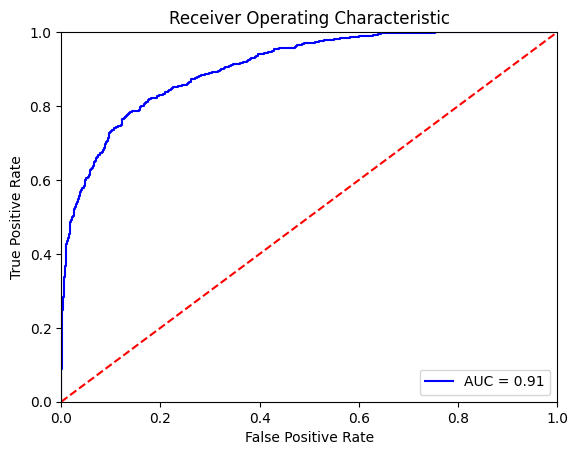

In [ ]:
import matplotlib.pyplot as plt

probs = bert_predict(bert_classifier, val_dataloader)

# Evaluate the Bert classifier
evaluate_roc(probs, y_test)

### Do Some Predictions

In [ ]:
print('Tokenizing data...')
test_inputs, test_masks = preprocessing_for_bert(['يبقى غير ذي مصداقية ، ومن يغض الطرف عن الفاسدين ، متواطئ',"ماشاءالله الله بالتوفيق والنجاح إن شاء الله"
, 'تفو على حالة كي دايرا'])

test_dataset = TensorDataset(test_inputs, test_masks)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=32)

Tokenizing data...


In [ ]:
probs = bert_predict(bert_classifier, test_dataloader)

threshold = 0.9
preds = np.where(probs[:, 1] > threshold, 1, 0)

print("Number of tweets predicted positive: ", preds.sum())

Number of tweets predicted positive:  1
